In [8]:
! pip install kaggle
! mkdir ~/.kaggle

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreyamadhwal","key":"fe9ace31bbad8036d1ee72068b580ffa"}'}

In [10]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 99% 119M/121M [00:01<00:00, 103MB/s] 
100% 121M/121M [00:01<00:00, 65.0MB/s]


In [12]:
! unzip face-expression-recognition-dataset

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications import MobileNetV2
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

In [14]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/images/images/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28821 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [15]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/images/images/validation",
                                           target_size=(224,224),
                                           batch_size=32)
val_data.class_indices

Found 7066 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

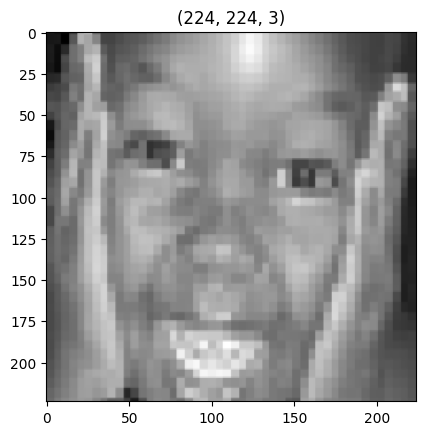

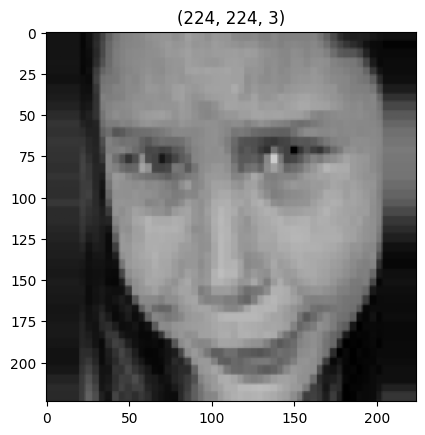

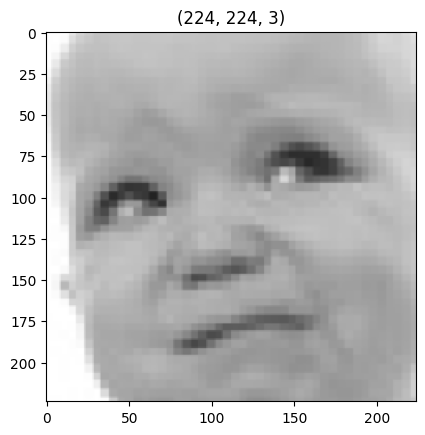

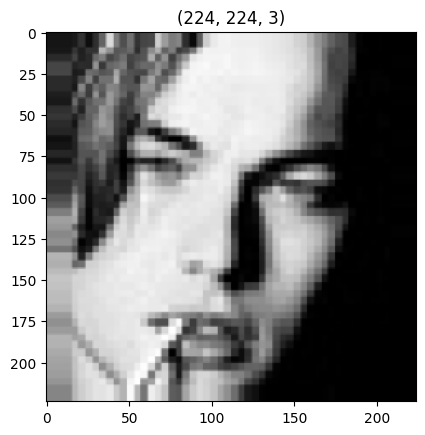

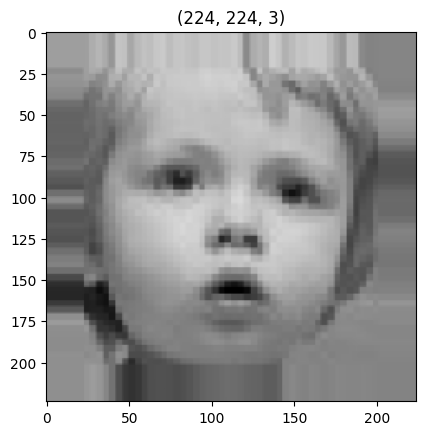

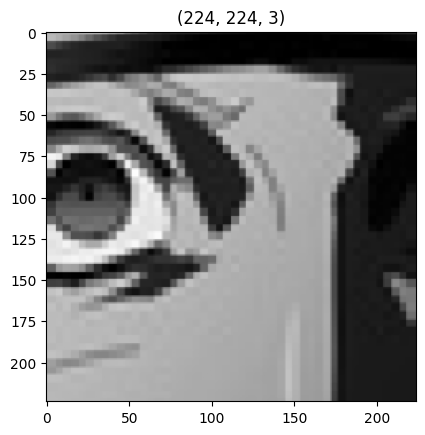

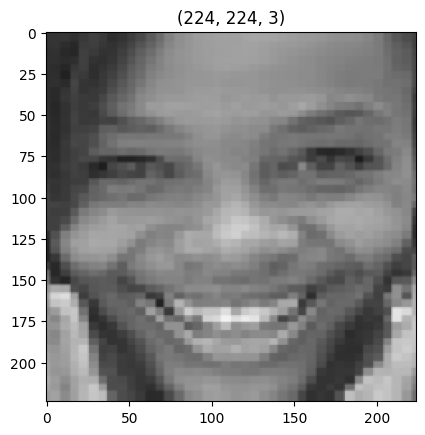

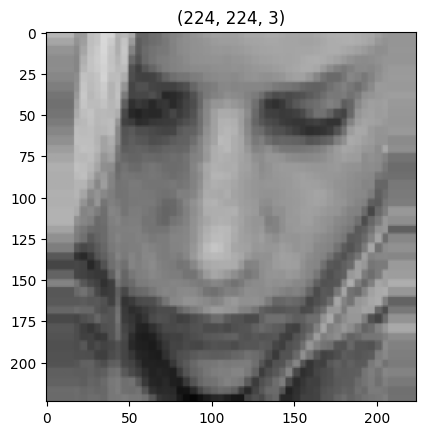

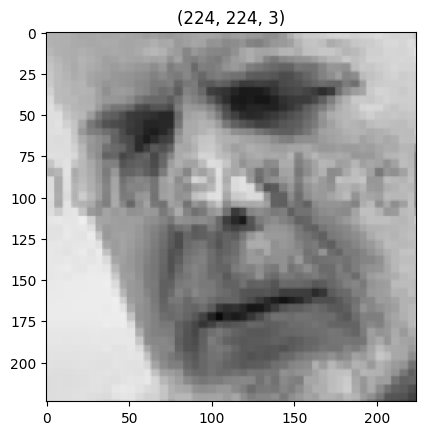

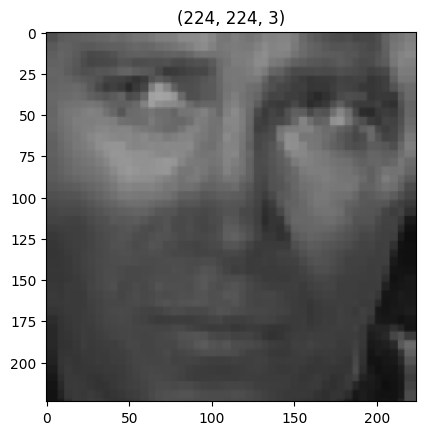

In [16]:
t_img , label = train_data.next()

def plotImages(img_arr, label):
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)


In [17]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

In [6]:
model = Model(base_model.input, x)
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [18]:
hist = model.fit_generator(train_data,
                           steps_per_epoch= 10,
                           epochs= 100,
                           validation_data= val_data,
                           validation_steps= 10)

<ipython-input-18-f030a17dbec5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/100
10/10 [==============================] - 38s 4s/step - loss: 24.2819 - accuracy: 0.1594 - val_loss: 14.6148 - val_accuracy: 0.1781
Epoch 2/100
10/10 [==============================] - 42s 4s/step - loss: 12.3584 - accuracy: 0.2719 - val_loss: 8.6695 - val_accuracy: 0.3625
Epoch 3/100
10/10 [==============================] - 39s 4s/step - loss: 8.2520 - accuracy: 0.3187 - val_loss: 6.2456 - val_accuracy: 0.3938
Epoch 4/100
10/10 [==============================] - 39s 4s/step - loss: 6.7719 - accuracy: 0.3500 - val_loss: 5.7488 - val_accuracy: 0.4500
Epoch 5/100
10/10 [==============================] - 34s 4s/step - loss: 5.3792 - accuracy: 0.4125 - val_loss: 5.3780 - val_accuracy: 0.4000
Epoch 6/100
10/10 [==============================] - 39s 4s/step - loss: 5.3446 - accuracy: 0.4313 - val_loss: 4.6146 - val_accuracy: 0.3969
Epoch 7/100
10/10 [==============================] - 40s 4s/step - loss: 4.8672 - accuracy: 0.3938 - val_loss: 5.4189 - val_accuracy: 0.3688
Epoch 8/10

In [19]:
model.save('final_model.h5')

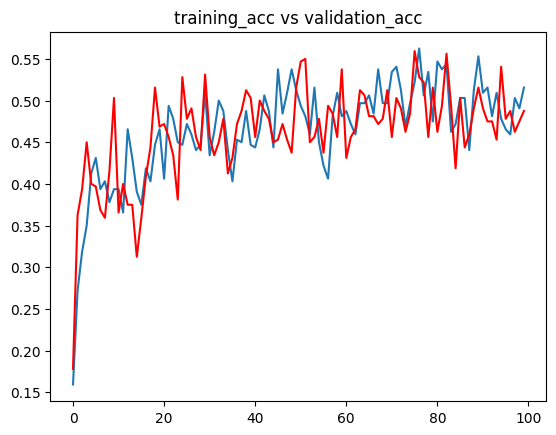

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'] , c = "red")
plt.title("training_acc vs validation_acc")
plt.show()

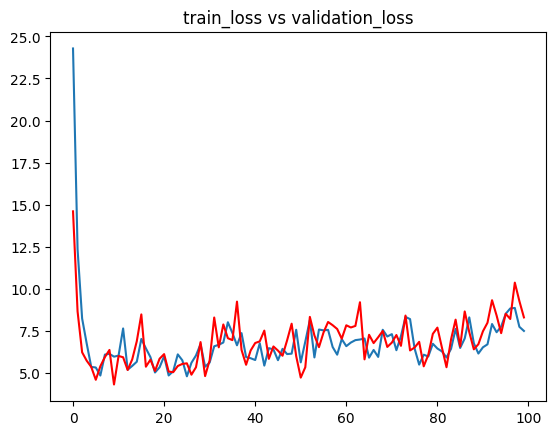

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'] , c = "red")
plt.title("train_loss vs validation_loss")
plt.show()

In [22]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 1s 637ms/step
 the image is of angry


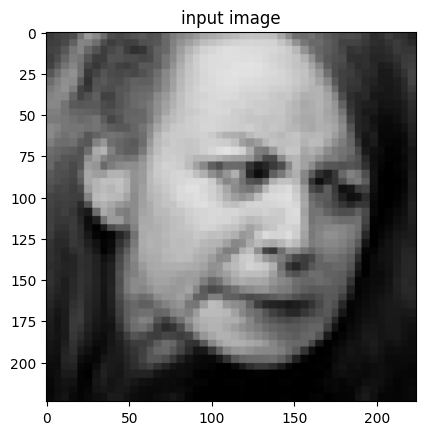

In [23]:
path = "/content/images/images/validation/angry/10052.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()